# Simulation 01

# Built-in R functions - Inverse cdf method - Intro Stan

# Josep Fortiana  2022-02-28

***
###### LaTeX macros
$\def\prob{P}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\DeclareMathOperator{\indep}{\perp\negthickspace\negthinspace\perp}$
***

# Exercise 01

Design and write the code for a generator of random numbers for the $\mbox{Exp}(\lambda)$ distribution based on the inverse cdf transformation method.

# Solution 01 - Stan version

1. Compute the quantile function $Q(y)=F^{-1}(y)$:
$$
		{\renewcommand{\arraystretch}{1.2}\begin{array}{lcl}
		F(x)		&=	&1-\exp(-\lambda\,x)=y,\\
		1-y			&=	&\exp(-\lambda\,x),\\
		\log(1-y)	&=	&-\lambda\,x,\\
		x			&=	&-\dfrac{1}{\lambda}\,\log(1-y).
		\end{array}}%
$$

2. Code for a function to compute random numbers following the $\mbox{Exp}(\lambda)$ distribution.
```
my.rexp<-function(n,rate=1){
            return(-log(1-runif(n))/rate)
            }
```

3. Compare to the `rexp` function from the R `stats` package.

# Using Stan

## 1. Load `rstan` 

The R package to communicate with Stan.

In [1]:
#install.packages("rstan", dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rstan)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



In [2]:
# Following directions:
# For execution on a local, multicore CPU with excess RAM we recommend calling
# options(mc.cores = parallel::detectCores()).
# To avoid recompilation of unchanged Stan programs, we recommend calling
# rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

## 2. Write the Stan program

In [7]:
Exp_Stancode <- "
    //functions {}
    data{
        real<lower=0> lambda;
        }
    //transformed data {}
    //parameters{}
    //transformed parameters {}
    //model{ }
    generated quantities{
        real y;
        y=exponential_rng(lambda);
        }
"

## 3. Translate model to C++ and compile to DSO

(A Dynamic Shared Object, e.g., a DLL in Windows)

In [8]:
Exp_stanDso <- stan_model( model_code=Exp_Stancode ) 

Alternatively

In [9]:
Exp_cppcode <- stanc( model_code=Exp_Stancode ) 

In [11]:
str(Exp_cppcode)

List of 5
 $ status       : logi TRUE
 $ model_cppname: chr "model8fc383b6bfd_Exp_Stancode"
 $ cppcode      : chr "// Code generated by Stan version 2.21.0\n\n#include <stan/model/model_header.hpp>\n\nnamespace model8fc383b6bf"| __truncated__
 $ model_name   : chr "Exp_Stancode"
 $ model_code   : chr "\n    //functions {}\n    data{\n        real<lower=0> lambda;\n        }\n    //transformed data {}\n    //par"| __truncated__
  ..- attr(*, "model_name2")= chr "Exp_Stancode"


In [12]:
writeLines(Exp_cppcode$cppcode,"Exp_Stan.cpp")

In [13]:
Exp_stanDso <- stan_model( stanc_ret = Exp_cppcode ) 

## 4. Enter data (if any), specify runtime quantities, and execute the code

For this model, the sampler must be configured to use the `"fixed-parameters"` setting because there are no parameters. Without parameter sampling there is no need for adaptation and the number of warmup iterations should be set to zero (See section 15.3. _Sampling without parameters_ in the Reference manual).

In [14]:
# Specify data:
lambda<-2
dataList <- list("lambda" = lambda)

In [15]:
# Generate posterior sample:
Exp_stanFit <- sampling( object=Exp_stanDso, 
                     data = dataList, algorithm="Fixed_param",
                     chains = 1, seed = 24025, iter = 10000, warmup = 0, thin = 1)


SAMPLING FOR MODEL 'Exp_Stancode' NOW (CHAIN 1).
Chain 1: Iteration:    1 / 10000 [  0%]  (Sampling)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Sampling)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0 seconds (Warm-up)
Chain 1:                0.01 seconds (Sampling)
Chain 1:                0.01 seconds (Total)
Chain 1: 


## 5. The resulting `stanFit` object contains all the information

The line below is usually commented due to its long output

In [16]:
str(Exp_stanFit)

Formal class 'stanfit' [package "rstan"] with 10 slots
  ..@ model_name: chr "Exp_Stancode"
  ..@ model_pars: chr [1:2] "y" "lp__"
  ..@ par_dims  :List of 2
  .. ..$ y   : num(0) 
  .. ..$ lp__: num(0) 
  ..@ mode      : int 0
  ..@ sim       :List of 12
  .. ..$ samples    :List of 1
  .. .. ..$ :List of 2
  .. .. .. ..$ y   : num [1:10000] 1.258 0.14 0.227 0.516 1.287 ...
  .. .. .. ..$ lp__: num [1:10000] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. .. ..- attr(*, "test_grad")= logi FALSE
  .. .. .. ..- attr(*, "args")=List of 16
  .. .. .. .. ..$ append_samples    : logi FALSE
  .. .. .. .. ..$ chain_id          : num 1
  .. .. .. .. ..$ control           :List of 11
  .. .. .. .. .. ..$ adapt_delta      : num 0.8
  .. .. .. .. .. ..$ adapt_engaged    : logi FALSE
  .. .. .. .. .. ..$ adapt_gamma      : num 0.05
  .. .. .. .. .. ..$ adapt_init_buffer: num 75
  .. .. .. .. .. ..$ adapt_kappa      : num 0.75
  .. .. .. .. .. ..$ adapt_t0         : num 10
  .. .. .. .. .. ..$ adapt_term_buffer: n

## 6. Extract just the random numbers we need

In [17]:
y<-extract(Exp_stanFit,par="y")$y

In [18]:
str(y)

 num [1:10000(1d)] 0.1397 0.2547 0.4728 0.2614 0.0479 ...
 - attr(*, "dimnames")=List of 1
  ..$ iterations: NULL


In [19]:
# Discard the unneeded attribute
attr(y,"dimnames")<-NULL
str(y)

 num [1:10000(1d)] 0.1397 0.2547 0.4728 0.2614 0.0479 ...


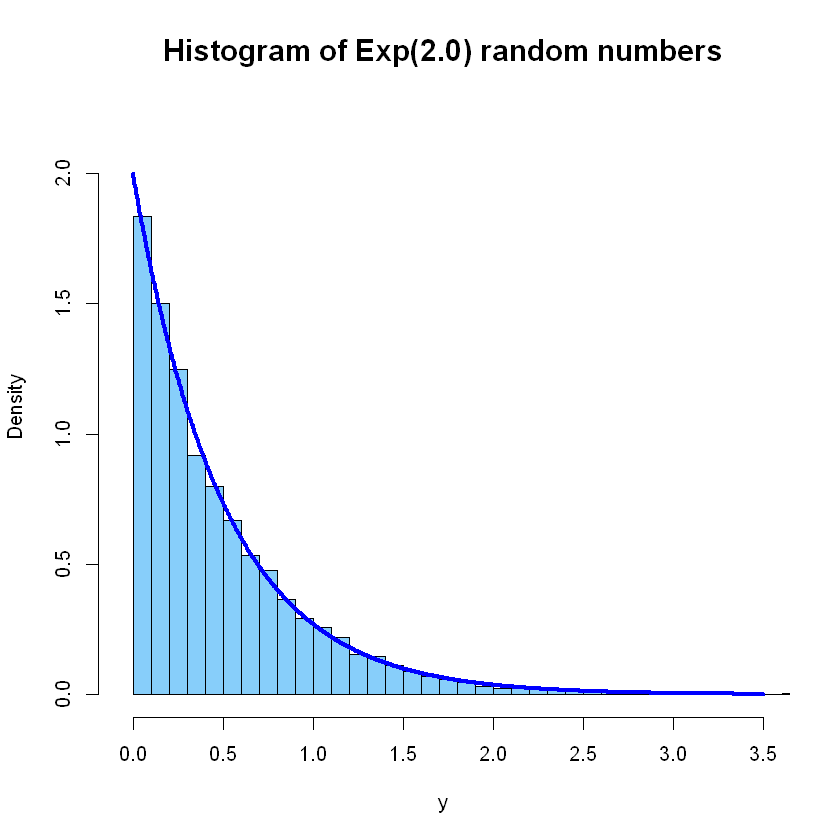

In [20]:
hist(y,freq=FALSE,col="LightSkyBlue",xlim=c(-0.05,3.5), ylim=c(0,2.2),nclass=60,
     main=sprintf("Histogram of Exp(%2.1f) random numbers",lambda),cex.main=1.5)
u<-seq(0,3.5,length=1000)
lines(u,dexp(u,rate=lambda),lwd=3.5,col="blue")